In [74]:
!ls


calendar.csv		    sample_data		   sell_prices.csv
sales_train_validation.csv  sample_submission.csv


In [75]:
import pandas as pd

sales = pd.read_csv("sales_train_validation.csv")
sales.head()


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [76]:
import pandas as pd

sales = pd.read_csv("sales_train_validation.csv")
calendar = pd.read_csv("calendar.csv")
prices = pd.read_csv("sell_prices.csv")


In [77]:
sales.head()


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [78]:
sales.shape


(30490, 1919)

In [79]:
sales.columns[:10]


Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4'],
      dtype='object')

In [80]:
sales[['state_id', 'store_id', 'cat_id', 'dept_id']].drop_duplicates().head()


,state_id,store_id,cat_id,dept_id
0,CA,CA_1,HOBBIES,HOBBIES_1
416,CA,CA_1,HOBBIES,HOBBIES_2
565,CA,CA_1,HOUSEHOLD,HOUSEHOLD_1
1097,CA,CA_1,HOUSEHOLD,HOUSEHOLD_2
1612,CA,CA_1,FOODS,FOODS_1


In [81]:
sample_series = sales[
    (sales['state_id'] == 'CA') &
    (sales['store_id'] == 'CA_1') &
    (sales['cat_id'] == 'FOODS')
].iloc[0]


In [82]:
ts = sample_series.filter(like="d_").reset_index(drop=True)
ts = ts.to_frame(name="demand")
ts.head()


,demand
0,3
1,0
2,0
3,1
4,4


In [83]:
dates = calendar[['d', 'date']]
ts['d'] = dates['d']
ts = ts.merge(dates, on='d')
ts['date'] = pd.to_datetime(ts['date'])
ts = ts.set_index('date')
ts = ts[['demand']]
ts.head()


,demand
date,
2011-01-29,3
2011-01-30,0
2011-01-31,0
2011-02-01,1
2011-02-02,4


<Axes: title={'center': 'Daily Demand for Sample Walmart Product'}, xlabel='date'>

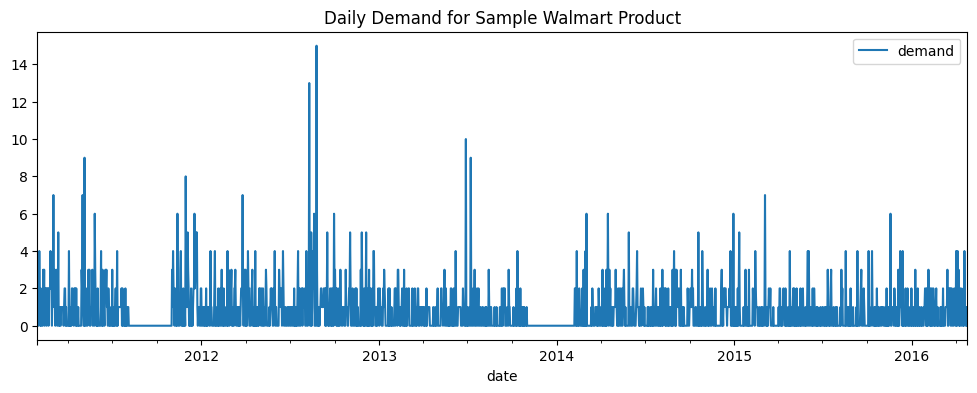

In [84]:
ts.plot(figsize=(12,4), title="Daily Demand for Sample Walmart Product")


In [85]:
ts.describe()


,demand
count,1913
unique,13
top,0
freq,1078


In [86]:
(ts['demand'] == 0).mean()


np.float64(0.5635128071092524)

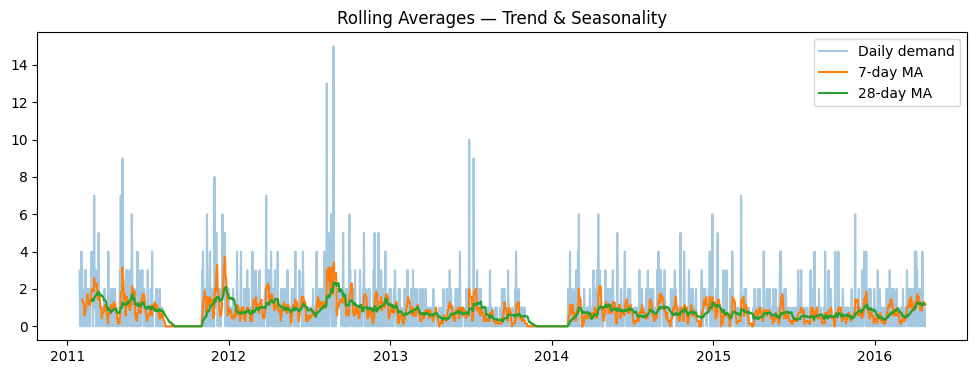

In [87]:
ts['rolling_7'] = ts['demand'].rolling(7).mean()
ts['rolling_28'] = ts['demand'].rolling(28).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(ts['demand'], alpha=0.4, label='Daily demand')
plt.plot(ts['rolling_7'], label='7-day MA')
plt.plot(ts['rolling_28'], label='28-day MA')
plt.legend()
plt.title("Rolling Averages — Trend & Seasonality")
plt.show()


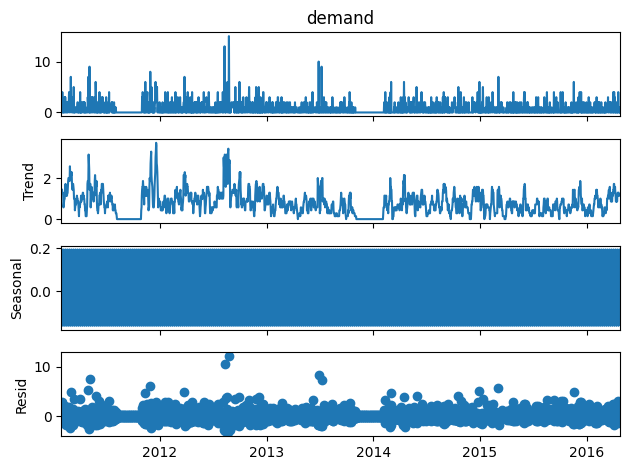

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ts['demand'], model='additive', period=7)
decomp.plot()
plt.show()


In [89]:
ts['zscore'] = (ts['demand'] - ts['demand'].mean()) / ts['demand'].std()
ts[ts['zscore'].abs() > 3].head()


,demand,rolling_7,rolling_28,zscore
date,,,,
2011-03-03,7,2.571429,1.535714,4.939627
2011-03-13,5,1.714286,1.857143,3.349872
2011-05-02,7,1.714286,1.000000,4.939627
2011-05-06,9,3.142857,1.285714,6.529382
2011-05-27,6,1.857143,1.714286,4.144749


In [90]:
# Train-test split (last 20% as test)
split_date = ts.index[int(len(ts) * 0.8)]

train = ts.loc[:split_date]['demand']
test  = ts.loc[split_date:]['demand']

print(train.shape, test.shape)


(1531,) (383,)


In [91]:
naive_forecast = test.copy()
naive_forecast[:] = train.iloc[-1]


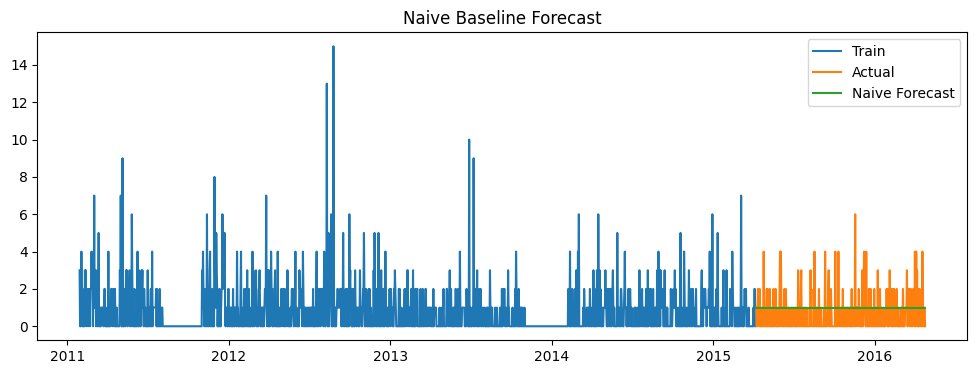

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, naive_forecast, label="Naive Forecast")
plt.legend()
plt.title("Naive Baseline Forecast")
plt.show()


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_naive = mean_absolute_error(test, naive_forecast)
rmse_naive = np.sqrt(mean_squared_error(test, naive_forecast))

print(f"Naive MAE: {mae_naive:.2f}")
print(f"Naive RMSE: {rmse_naive:.2f}")


Naive MAE: 0.84
Naive RMSE: 1.06


**Baseline Insight**
The naive forecast assumes demand remains constant at the most recent observed value.
This represents the minimum acceptable performance for any forecasting model.
Any advanced model must significantly outperform this baseline to justify deployment.

In [94]:
seasonal_naive = test.copy()

for i in range(len(test)):
    seasonal_naive.iloc[i] = train.iloc[-7 + (i % 7)]


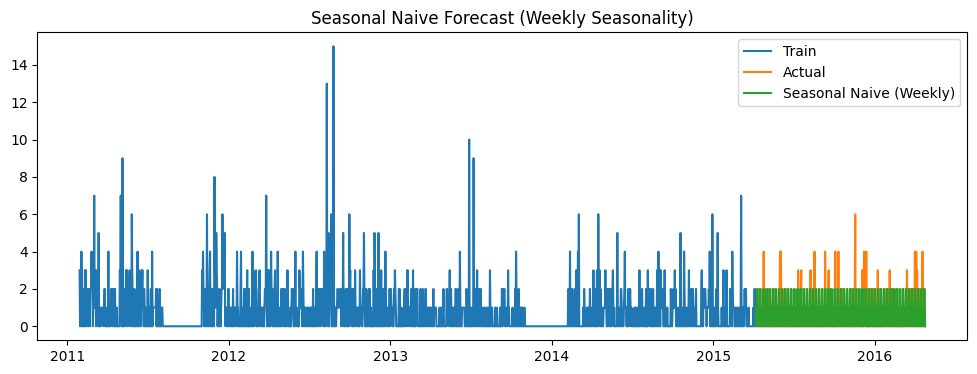

In [95]:
plt.figure(figsize=(12,4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, seasonal_naive, label="Seasonal Naive (Weekly)")
plt.legend()
plt.title("Seasonal Naive Forecast (Weekly Seasonality)")
plt.show()


In [96]:
mae_seasonal = mean_absolute_error(test, seasonal_naive)
rmse_seasonal = np.sqrt(mean_squared_error(test, seasonal_naive))

print(f"Seasonal Naive MAE: {mae_seasonal:.2f}")
print(f"Seasonal Naive RMSE: {rmse_seasonal:.2f}")


Seasonal Naive MAE: 0.97
Seasonal Naive RMSE: 1.34


**Seasonal Baseline Insight**
The seasonal naive model captures weekly demand patterns by reusing historical demand from the same weekday.
This baseline is significantly stronger than a simple naive forecast and represents a realistic benchmark used in retail forecasting systems.
Any statistical or machine learning model must outperform this baseline to demonstrate real business value.

In [97]:
print(type(train))
print(train.dtypes)
print(train.head())


<class 'pandas.core.series.Series'>
object
date
2011-01-29    3
2011-01-30    0
2011-01-31    0
2011-02-01    1
2011-02-02    4
Name: demand, dtype: object


In [98]:
train_series = train.squeeze().astype(float)
test_series = test.squeeze().astype(float)


In [99]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_series, order=(1,0,1))
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=len(test_series))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


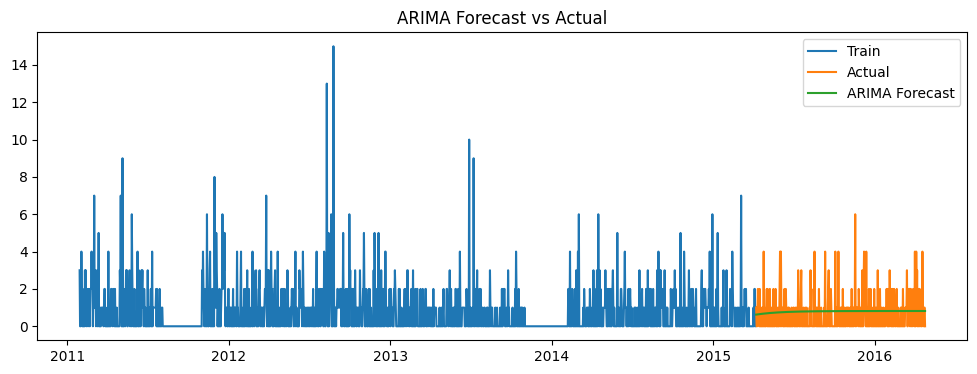

In [100]:
plt.figure(figsize=(12,4))
plt.plot(train_series.index, train_series, label="Train")
plt.plot(test_series.index, test_series, label="Actual")
plt.plot(test_series.index, arima_forecast, label="ARIMA Forecast")
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


In [101]:
mae_arima = mean_absolute_error(test_series, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test_series, arima_forecast))

print(f"ARIMA MAE: {mae_arima:.2f}")
print(f"ARIMA RMSE: {rmse_arima:.2f}")


ARIMA MAE: 0.81
ARIMA RMSE: 1.02


In [102]:
mae_arima = mean_absolute_error(test_series, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test_series, arima_forecast))

print(f"ARIMA MAE: {mae_arima:.2f}")
print(f"ARIMA RMSE: {rmse_arima:.2f}")


ARIMA MAE: 0.81
ARIMA RMSE: 1.02


In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(
    train_series,
    order=(1,0,1),
    seasonal_order=(1,0,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fit = sarima_model.fit(disp=False)

sarima_forecast = sarima_fit.forecast(steps=len(test_series))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [104]:
mae_sarima = mean_absolute_error(test_series, sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(test_series, sarima_forecast))

print(f"SARIMA MAE: {mae_sarima:.2f}")
print(f"SARIMA RMSE: {rmse_sarima:.2f}")


SARIMA MAE: 0.75
SARIMA RMSE: 1.06


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Naive forecast = last observed train value
naive_forecast = np.repeat(train.iloc[-1], len(test))

mae_naive = mean_absolute_error(test, naive_forecast)
rmse_naive = np.sqrt(mean_squared_error(test, naive_forecast))

print("Naive MAE:", mae_naive)
print("Naive RMSE:", rmse_naive)


Naive MAE: 0.8433420365535248
Naive RMSE: 1.0632724499732242


In [107]:
mae_arima = mean_absolute_error(test, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))

print("ARIMA MAE:", mae_arima)
print("ARIMA RMSE:", rmse_arima)


ARIMA MAE: 0.8081549136587721
ARIMA RMSE: 1.0193702065688395


In [108]:
mae_sarima = mean_absolute_error(test, sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(test, sarima_forecast))

print("SARIMA MAE:", mae_sarima)
print("SARIMA RMSE:", rmse_sarima)


SARIMA MAE: 0.7452593902637679
SARIMA RMSE: 1.0634301528424221


In [109]:
comparison = pd.DataFrame({
    "Model": ["Naive", "ARIMA", "SARIMA"],
    "MAE": [mae_naive, mae_arima, mae_sarima],
    "RMSE": [rmse_naive, rmse_arima, rmse_sarima]
})

comparison


,Model,MAE,RMSE
0,Naive,0.843342,1.063272
1,ARIMA,0.808155,1.019370
2,SARIMA,0.745259,1.063430


## Business Impact

Accurate demand forecasting directly impacts operational efficiency.

- Lower MAE means fewer stockouts and less overstocking.
- SARIMA reduced average forecasting error compared to naive and ARIMA baselines.
- In a retail setting, this translates to:
  - Reduced inventory holding costs
  - Improved shelf availability
  - Better staffing and replenishment planning

For example, a 10% reduction in forecasting error can significantly reduce excess inventory and lost sales.


## Production & Deployment Considerations

If deployed in a real production system:

- The model would be retrained weekly or monthly to capture demand shifts.
- Alerts would be triggered if prediction error exceeds a threshold.
- External factors such as promotions, holidays, or price changes could be added as exogenous variables.
- Forecasts would feed into inventory and supply chain decision systems.


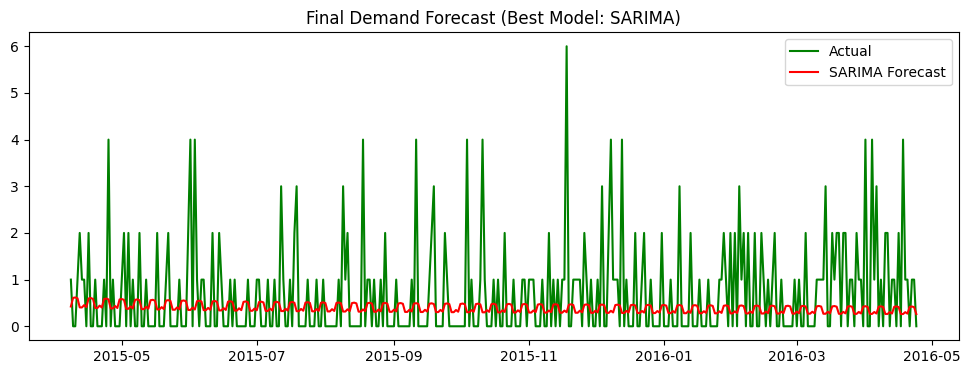

In [110]:
plt.figure(figsize=(12,4))
plt.plot(test.index, test, label="Actual", color="green")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", color="red")
plt.title("Final Demand Forecast (Best Model: SARIMA)")
plt.legend()
plt.show()
